# Task - 2: Prediction using Unsupervised ML

In [1]:
#Importing initial necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Loading Iris Dataset

In [3]:
iris = pd.read_csv('C:\\Users\\HP\\Documents\\The sparks\\Iris.csv', index_col='Id')

In [4]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Our dataset has no duplicates and no null values. 

In [7]:
target = iris.Species

Separating the dataset for clustering

In [8]:
X = iris.drop('Species', axis=1).values

# Importing KMeans Model

In [9]:
from sklearn.cluster import KMeans

#### Getting optimal number of Clusters using Elbow method

In [10]:
wcss = []

for i in range(1,15):
    kmean = KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

Text(0.5, 1.0, 'The elbow method')

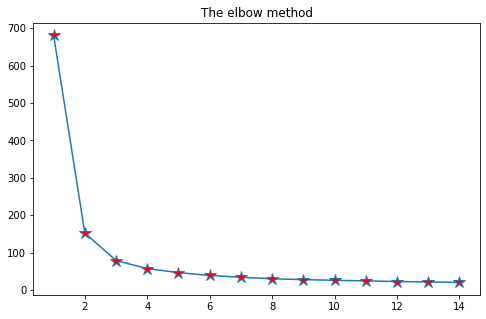

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1,15), wcss, marker='*', markerfacecolor = 'red', ms=12)
plt.title('The elbow method')


According to the Elbow method 3 is the optimal number of cluster

### To Standardize the data, using StandardScaler method

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

##### Fitting and Predicting the clusters

In [15]:
kmean = KMeans(n_clusters=3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
kmean.fit(X_scale)
y_pred = kmean.predict(X_scale)

In [16]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
print(X[y_pred==2].shape)

(47, 4)


In [18]:
kmean.cluster_centers_

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

### Visualizing the Clusters with Centeroids

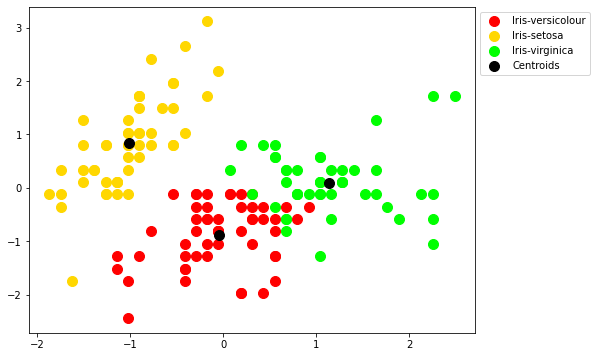

In [19]:
plt.figure(figsize=(8,6))
# Visualizing the clusters with SepalLength and SepalWidth

plt.scatter(X_scale[y_pred == 0, 0], X_scale[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')

plt.scatter(X_scale[y_pred == 1, 0], X_scale[y_pred == 1, 1], 
            s = 100, c = 'gold', label = 'Iris-setosa')

plt.scatter(X_scale[y_pred == 2, 0], X_scale[y_pred == 2, 1], 
            s = 100, c = 'lime', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend(loc=2,bbox_to_anchor=(1,1,0,0) )

We have succesfully clustered the data as with the optimal number of clusters

## Thank you